Question 5

a-e)

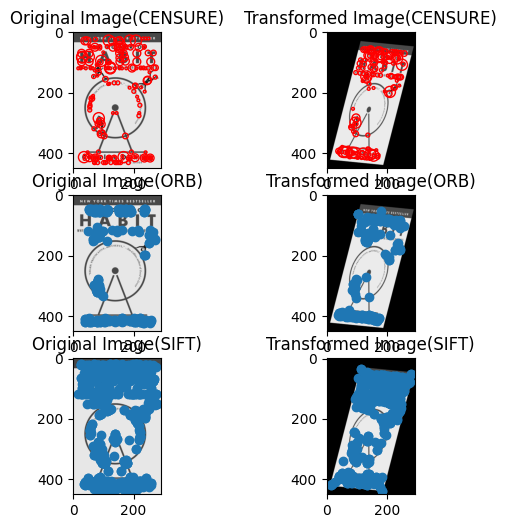

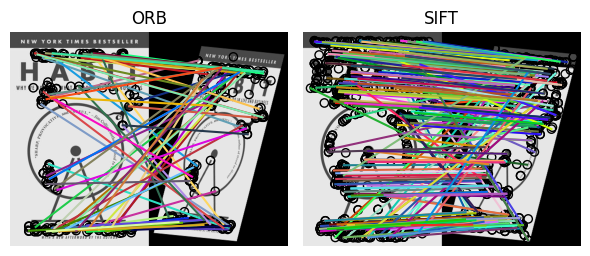

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import CENSURE, match_descriptors, ORB, plot_matches, SIFT
from skimage.transform import warp, AffineTransform
from PIL import Image

tform = AffineTransform(scale=(0.6, 0.9), rotation=0.1, shear=0.15,
                        translation=(110, 30))

original_image = rgb2gray(Image.open("book.jpg"))
original_image = np.asanyarray(original_image)

image = warp(original_image, tform.inverse)
image = Image.fromarray((image * 255).astype(np.uint8))
image.save("transformed.png", "PNG")

detector_censure = CENSURE()
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))

detector_censure.detect(original_image)
keypoints_censure_1 = detector_censure.keypoints

ax[0][0].imshow(original_image, cmap=plt.cm.gray)
ax[0][0].scatter(keypoints_censure_1[:, 1], keypoints_censure_1[:, 0],
              2 ** detector_censure.scales, facecolors='none', edgecolors='r')
ax[0][0].set_title("Original Image(CENSURE)")

detector_censure.detect(image)
keypoints_censure_2 = detector_censure.keypoints

ax[0][1].imshow(image, cmap=plt.cm.gray)
ax[0][1].scatter(keypoints_censure_2[:, 1], keypoints_censure_2[:, 0],
              2 ** detector_censure.scales, facecolors='none', edgecolors='r')
ax[0][1].set_title('Transformed Image(CENSURE)')

descriptor_extractor_orb = ORB(n_keypoints=200)

descriptor_extractor_orb.detect_and_extract(original_image)
keypoints_orb_1 = descriptor_extractor_orb.keypoints
descriptors_orb_1 = descriptor_extractor_orb.descriptors

ax[1][0].imshow(original_image, cmap=plt.cm.gray)
ax[1][0].scatter(keypoints_orb_1[:, 1], keypoints_orb_1[:, 0])
ax[1][0].set_title("Original Image(ORB)")

descriptor_extractor_orb.detect_and_extract(image)
keypoints_orb_2 = descriptor_extractor_orb.keypoints
descriptors_orb_2 = descriptor_extractor_orb.descriptors

ax[1][1].imshow(image, cmap=plt.cm.gray)
ax[1][1].scatter(keypoints_orb_2[:, 1], keypoints_orb_2[:, 0])
ax[1][1].set_title("Transformed Image(ORB)")

descriptor_extractor_sift = SIFT()

descriptor_extractor_sift.detect_and_extract(original_image)
keypoints_sift_1 = descriptor_extractor_sift.keypoints
descriptors_sift_1 = descriptor_extractor_sift.descriptors

ax[2][0].imshow(original_image, cmap=plt.cm.gray)
ax[2][0].scatter(keypoints_sift_1[:, 1], keypoints_sift_1[:, 0])
ax[2][0].set_title("Original Image(SIFT)")

descriptor_extractor_sift.detect_and_extract(image)
keypoints_sift_2 = descriptor_extractor_sift.keypoints
descriptors_sift_2 = descriptor_extractor_sift.descriptors

ax[2][1].imshow(image, cmap=plt.cm.gray)
ax[2][1].scatter(keypoints_sift_2[:, 1], keypoints_sift_2[:, 0])
ax[2][1].set_title("Transformed Image(SIFT)")

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
matches_orb_12 = match_descriptors(descriptors_orb_1, descriptors_orb_2, cross_check=True)
matches_sift_12 = match_descriptors(descriptors_sift_1, descriptors_sift_2, cross_check=True)


plt.gray()
plot_matches(ax2[0], original_image, image, keypoints_orb_1, keypoints_orb_2, matches_orb_12)
ax2[0].axis('off')
ax2[0].set_title("ORB")
plot_matches(ax2[1], original_image, image, keypoints_sift_1, keypoints_sift_2, matches_sift_12)
ax2[1].axis('off')
ax2[1].set_title("SIFT")

plt.tight_layout()
plt.show()



CENSURE, ORB, and SIFT are feature extraction methods used to extract key points and descriptors from images. Here's a brief comparison of these methods:

#***CENSURE*** (Center Surround Extremas for Realtime Feature Detection and Matching):
It is a scale-invariant feature detector and descriptor that detects keypoints in an image using a center surround approach. It uses a Laplacian of Gaussian (LoG) filter to find scale-space extrema and detects keypoints by analyzing the scale-space extrema with a center-surround difference-of-Gaussian (DoG) filter. CENSURE is known for its fast performance and its ability to detect keypoints in real-time.

#***ORB*** (Oriented FAST and Rotated BRIEF):
ORB is a fast and efficient alternative to SIFT and SURF for feature extraction. It is a scale and rotation invariant method that uses a combination of corner detection and binary descriptors to extract features. ORB uses the FAST algorithm to detect keypoints and then computes BRIEF (Binary Robust Independent Elementary Features) descriptors, which are binary strings that represent the local image patch around the keypoint.

#***SIFT*** (Scale-Invariant Feature Transform):
SIFT is a feature detection and description algorithm that is widely used in computer vision. It is a scale-invariant method that detects keypoints at different scales and orientations. SIFT works by convolving the image with a series of Gaussian filters to obtain scale-space representations of the image. It then detects keypoints at different scales and orientations by analyzing the difference of Gaussian (DoG) pyramid. Finally, it computes a descriptor for each keypoint by analyzing the local gradient orientations.


In terms of performance, ORB is generally faster than SIFT and CENSURE due to its simpler feature extraction method. However, SIFT and CENSURE tend to be more robust to changes in lighting and viewpoint, and may provide more accurate feature descriptors in some cases.


When it comes to accuracy, the choice of feature extraction method depends on the specific application and image content. It is important to test each method on the specific dataset and task to determine which method works best.

f)

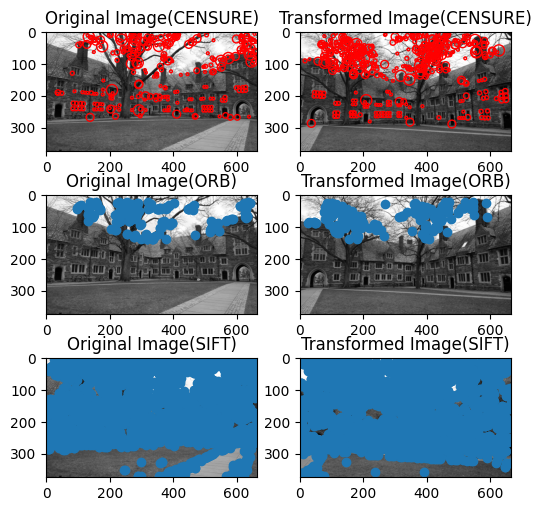

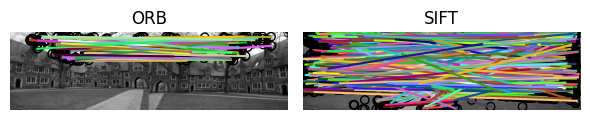

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import CENSURE, match_descriptors, ORB, plot_matches, SIFT
from skimage.transform import warp, AffineTransform
from PIL import Image

original_image = rgb2gray(Image.open("IMG_1.jpg"))
original_image = np.asanyarray(original_image)

image = rgb2gray(Image.open("IMG_2.jpg"))
image = np.asanyarray(image)

detector_censure = CENSURE()
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6, 6))

detector_censure.detect(original_image)
keypoints_censure_1 = detector_censure.keypoints

ax[0][0].imshow(original_image, cmap=plt.cm.gray)
ax[0][0].scatter(keypoints_censure_1[:, 1], keypoints_censure_1[:, 0],
              2 ** detector_censure.scales, facecolors='none', edgecolors='r')
ax[0][0].set_title("Original Image(CENSURE)")

detector_censure.detect(image)
keypoints_censure_2 = detector_censure.keypoints

ax[0][1].imshow(image, cmap=plt.cm.gray)
ax[0][1].scatter(keypoints_censure_2[:, 1], keypoints_censure_2[:, 0],
              2 ** detector_censure.scales, facecolors='none', edgecolors='r')
ax[0][1].set_title('Transformed Image(CENSURE)')

descriptor_extractor_orb = ORB(n_keypoints=200)

descriptor_extractor_orb.detect_and_extract(original_image)
keypoints_orb_1 = descriptor_extractor_orb.keypoints
descriptors_orb_1 = descriptor_extractor_orb.descriptors

ax[1][0].imshow(original_image, cmap=plt.cm.gray)
ax[1][0].scatter(keypoints_orb_1[:, 1], keypoints_orb_1[:, 0])
ax[1][0].set_title("Original Image(ORB)")

descriptor_extractor_orb.detect_and_extract(image)
keypoints_orb_2 = descriptor_extractor_orb.keypoints
descriptors_orb_2 = descriptor_extractor_orb.descriptors

ax[1][1].imshow(image, cmap=plt.cm.gray)
ax[1][1].scatter(keypoints_orb_2[:, 1], keypoints_orb_2[:, 0])
ax[1][1].set_title("Transformed Image(ORB)")

descriptor_extractor_sift = SIFT()

descriptor_extractor_sift.detect_and_extract(original_image)
keypoints_sift_1 = descriptor_extractor_sift.keypoints
descriptors_sift_1 = descriptor_extractor_sift.descriptors

ax[2][0].imshow(original_image, cmap=plt.cm.gray)
ax[2][0].scatter(keypoints_sift_1[:, 1], keypoints_sift_1[:, 0])
ax[2][0].set_title("Original Image(SIFT)")

descriptor_extractor_sift.detect_and_extract(image)
keypoints_sift_2 = descriptor_extractor_sift.keypoints
descriptors_sift_2 = descriptor_extractor_sift.descriptors

ax[2][1].imshow(image, cmap=plt.cm.gray)
ax[2][1].scatter(keypoints_sift_2[:, 1], keypoints_sift_2[:, 0])
ax[2][1].set_title("Transformed Image(SIFT)")

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))
matches_orb_12 = match_descriptors(descriptors_orb_1, descriptors_orb_2, cross_check=True)
matches_sift_12 = match_descriptors(descriptors_sift_1, descriptors_sift_2, cross_check=True)


plt.gray()
plot_matches(ax2[0], original_image, image, keypoints_orb_1, keypoints_orb_2, matches_orb_12)
ax2[0].axis('off')
ax2[0].set_title("ORB")
plot_matches(ax2[1], original_image, image, keypoints_sift_1, keypoints_sift_2, matches_sift_12)
ax2[1].axis('off')
ax2[1].set_title("SIFT")

plt.tight_layout()
plt.show()